Part A - Data Preprocessing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [20]:
# 1. Load the dataset
# Download the CSV file from the URL
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv "
df = pd.read_csv(url, sep=',')

df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [21]:
# 2. Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
1  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
2  

In [22]:
# 3. Handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Strategy: Impute numerical columns with the mean and categorical columns with the mode.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
        # Since you can't calculate a meaningful average for words, the best approach is to fill in the missing values with the category that appears most often.
        # This assumes that the missing value is likely to be the most common category.
    else:
        df[col].fillna(df[col].mean(), inplace=True)
        # By filling missing values with the average of the existing values, you can keep the overall mean of the column the same.

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

Missing values after handling:
url                     0
price_in_rp             0
title                   0
address                 0
district                0
city     

/tmp/ipython-input-2615448057.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2615448057.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

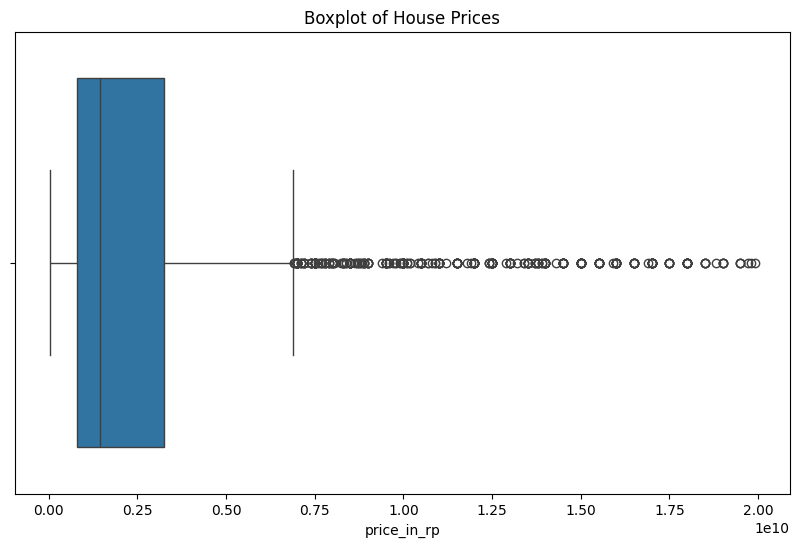

In [33]:
# 4. Detect & handle outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_in_rp'])
plt.title('Boxplot of House Prices')
plt.show()

# Justification: The boxplot for prices shows significant outliers on the higher end,
# which can skew the analysis. We will filter the data to remove the most extreme outliers.
# We will keep houses with prices less than 20,000,000,000.
df = df[df['price_in_rp'] < 20000000000]

In [24]:
# 5. Feature Engineering
# Create 'num_facilities' feature
df['num_facilities'] = df['facilities'].apply(lambda x: len(x.split(',')))

# Binning 'num_facilities'
bins = [0, 2, 5, 10, df['num_facilities'].max()]
labels = ['Few', 'Moderate', 'Good', 'Excellent']
df['facilities_category'] = pd.cut(df['num_facilities'], bins=bins, labels=labels, right=False)

print("\nFirst 5 rows after feature engineering:")
print(df.head())


First 5 rows after feature engineering:
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
1  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.2

Part B - EDA

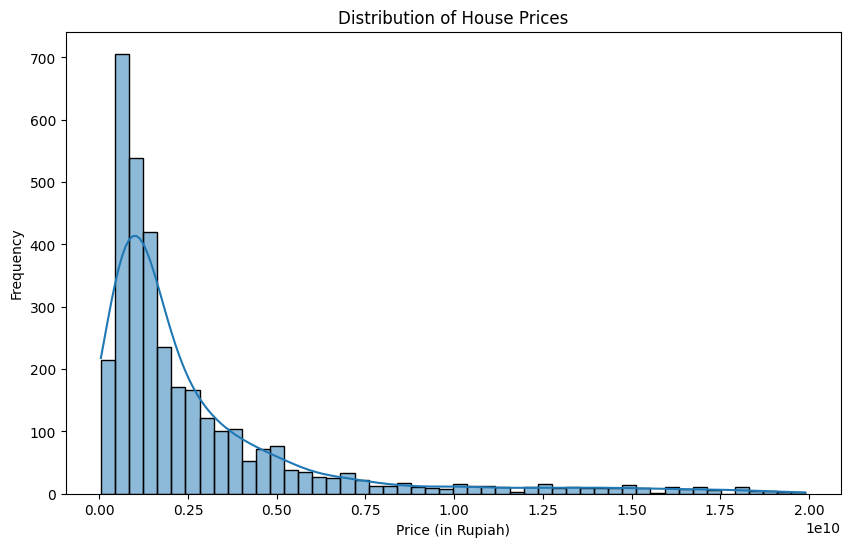


The histogram shows that the majority of house prices are concentrated at the lower end of the spectrum.
This indicates a right-skewed distribution, which is typical for real estate prices.


In [35]:
# 1. Histogram of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_in_rp'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Rupiah)')
plt.ylabel('Frequency')
plt.show()

print("\nThe histogram shows that the majority of house prices are concentrated at the lower end of the spectrum.\nThis indicates a right-skewed distribution, which is typical for real estate prices.")

/tmp/ipython-input-1464615842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


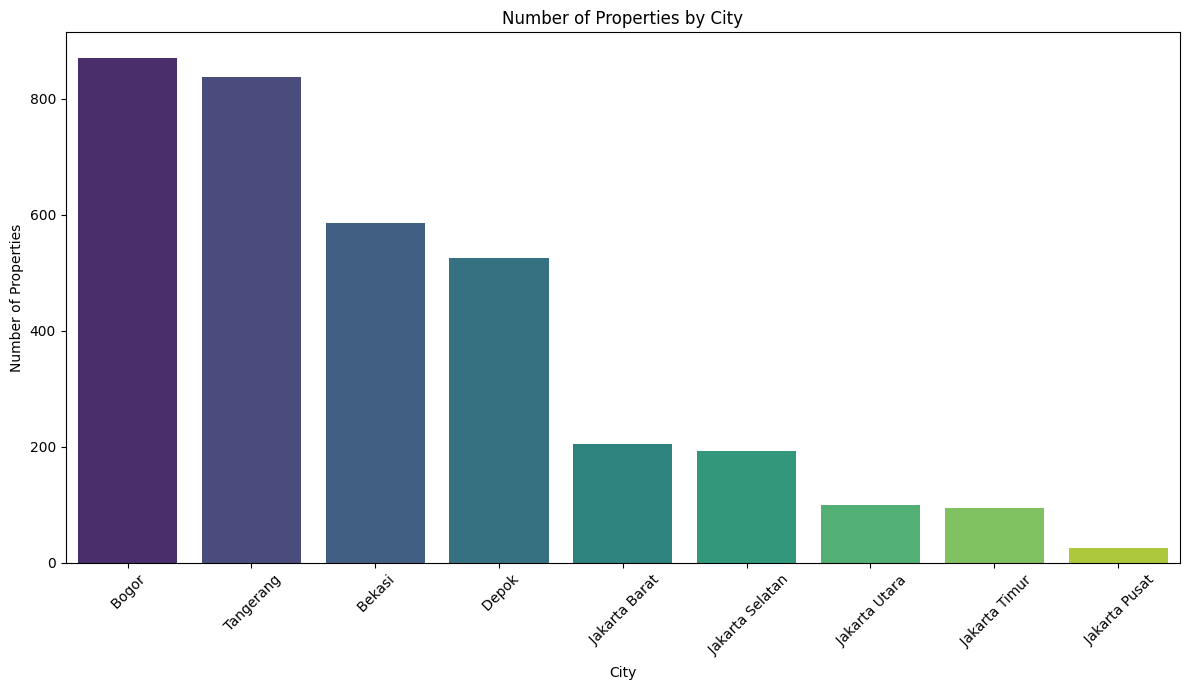


The bar plot reveals that Bogor has the highest number of property listings in the dataset, followed by Tangerang and Bekasi.
This suggests a higher volume of real estate activity in these cities compared to others in the Jabodetabek area.


In [36]:
# 2. Barplot of Property Count by City
plt.figure(figsize=(12, 7))
city_counts = df['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Number of Properties by City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nThe bar plot reveals that Bogor has the highest number of property listings in the dataset, followed by Tangerang and Bekasi.\nThis suggests a higher volume of real estate activity in these cities compared to others in the Jabodetabek area.")

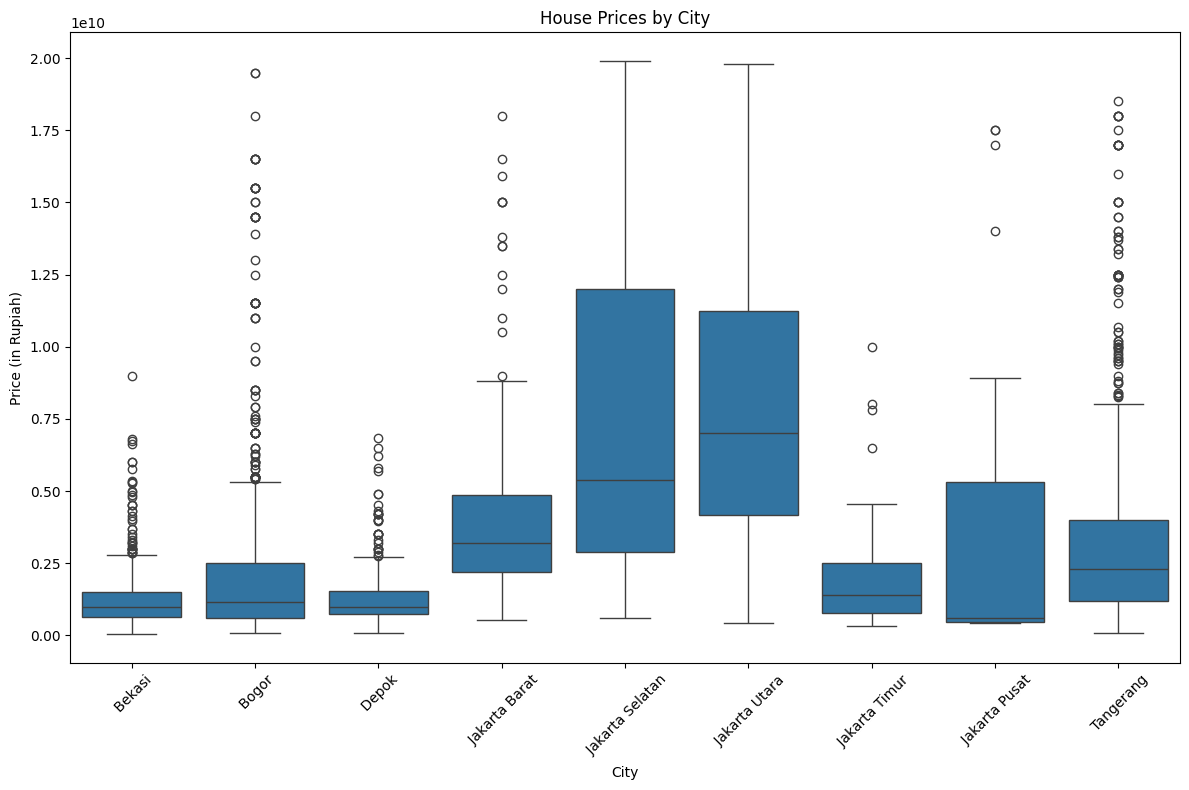


This boxplot provides a comparative view of house prices across different cities.
It is evident that Jakarta Pusat has the highest median house price, as well as the largest price range, indicating a more expensive and varied real estate market compared to other cities in the dataset.


In [37]:
# 3. Boxplot of Price by City
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='price_in_rp', data=df)
plt.title('House Prices by City')
plt.xlabel('City')
plt.ylabel('Price (in Rupiah)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nThis boxplot provides a comparative view of house prices across different cities.\nIt is evident that Jakarta Pusat has the highest median house price, as well as the largest price range, indicating a more expensive and varied real estate market compared to other cities in the dataset.")

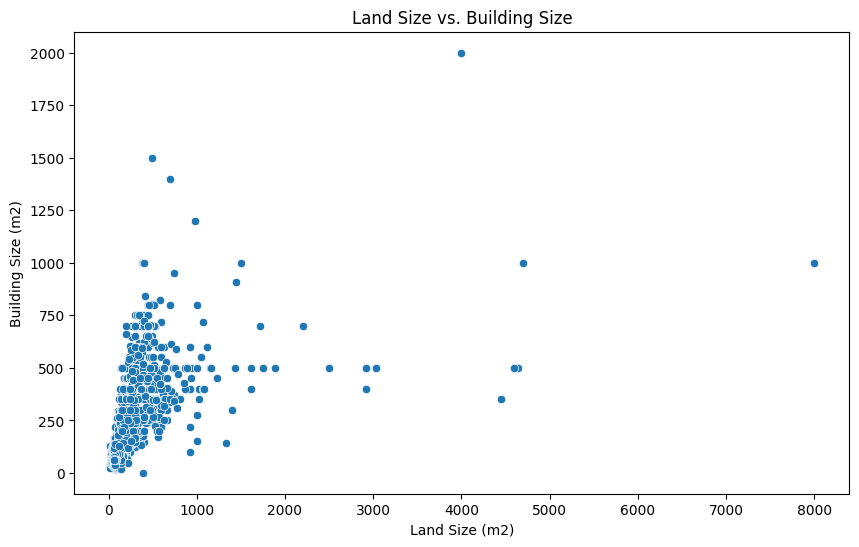


The scatter plot shows a positive correlation between land size and building size, which is expected.
As the land size increases, the building size also tends to increase.
There is a clear linear relationship between these two variables.


In [38]:
# 4. Scatter plot of Land Size vs. Building Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='land_size_m2', y='building_size_m2', data=df)
plt.title('Land Size vs. Building Size')
plt.xlabel('Land Size (m2)')
plt.ylabel('Building Size (m2)')
plt.show()

print("\nThe scatter plot shows a positive correlation between land size and building size, which is expected.\nAs the land size increases, the building size also tends to increase.\nThere is a clear linear relationship between these two variables.")

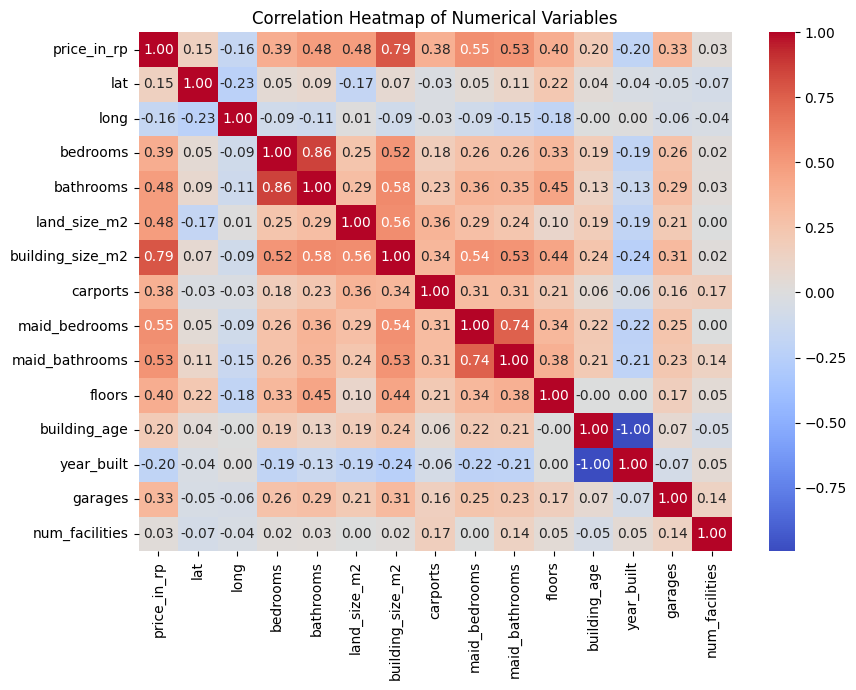


The heatmap visualizes the correlation between all numerical variables in the dataset. Key takeaways include:
1. A strong positive correlation between price_in_rp and building_size_m2, as well as land_size_m2, confirming that larger houses and properties are more expensive.
2. A strong positive correlation between bedrooms and bathrooms, which is logical as larger houses tend to have more of both.
3. A moderately positive correlation between floors and price_in_rp, indicating that houses with more floors tend to be more expensive.
This comprehensive analysis provides valuable insights into the Jabodetabek housing market, highlighting the key factors that influence property prices and the distribution of real estate across different cities.


In [39]:
# 5. Heatmap of correlations
plt.figure(figsize=(9, 7))
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

print("\nThe heatmap visualizes the correlation between all numerical variables in the dataset. Key takeaways include:\n1. A strong positive correlation between price_in_rp and building_size_m2, as well as land_size_m2, confirming that larger houses and properties are more expensive.\n2. A strong positive correlation between bedrooms and bathrooms, which is logical as larger houses tend to have more of both.\n3. A moderately positive correlation between floors and price_in_rp, indicating that houses with more floors tend to be more expensive.\nThis comprehensive analysis provides valuable insights into the Jabodetabek housing market, highlighting the key factors that influence property prices and the distribution of real estate across different cities.")